In [12]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

# nuosavų funkcijų importavimas:
from Mano_Funkcijos import *
 

In [13]:
DB = cnt.connect(
    host='88.223.121.130',
    port=3306,
    user='user',
    password = 'slaptazodis',
    database = 'works'
)
C = DB.cursor()

In [8]:

import pandas as pd

class SolarAnalyzer:
    def __init__(self, filename):
        # Skaityti .dat failą su stulpelių atskyrimu pagal ';' ir su stulpelių pavadinimais pirmoje eilutėje
        self.filename = filename
        self.data = pd.read_csv(filename, delimiter=';', header=0)
    
    def process_data(self):
        # Step 1: Padaryti 4-to stulpelio minimalia neigiama verte teigiama
        Pmin = self.data.iloc[:, 3].min()
        if Pmin < 0:
            Pmin = -Pmin  # Konvertuoti Pmin į teigiamą vertę

        # Step 2: Surasti pirmame stulpelyje verte, artima arba lygią 0, ir surasti atitinkamą verte treciame stulpelyje
        closest_to_zero_col1 = self.data.iloc[:, 0].sub(0).abs().idxmin()
        jsc = self.data.iloc[closest_to_zero_col1, 2]

        # Step 3: Surasti treciame stulpelyje verte, artima arba lygią 0, ir surasti atitinkamą verte pirmajame stulpelyje
        closest_to_zero_col3 = self.data.iloc[:, 2].sub(0).abs().idxmin()
        Uoc = self.data.iloc[closest_to_zero_col3, 0]

        # Step 4: Apskaičiuoti FF
        FF = (Pmin / (jsc * Uoc)) * 100
        
        # Padaryti FF teigiamą, jei jis yra neigiamas
        if FF < 0:
            FF = -FF

        # Grąžinti visas reikšmes
        return FF, Pmin, jsc, Uoc

# Naudojimas
filename = '../../DATA/OOP_DATA/REF_D_1k_FW_2.08.dat'  #  .dat failo pavadinimas
processor = SolarAnalyzer(filename)
FF_value, Pmin_value, jsc_value, Uoc_value = processor.process_data()

print(f'FF = {FF_value}, Pmin =pce= {Pmin_value}, Jsc= {jsc_value}, Uoc = {Uoc_value}')

FF = 52.279472222827074, Pmin =pce= 14.9890787, Jsc= -25.9075833, Uoc = 1.1066667


In [10]:
import os
import pandas as pd

class SolarAnalyzer:
    def __init__(self, filename):
        # Skaityti .dat failą su stulpelių atskyrimu pagal ';' ir su stulpelių pavadinimais pirmoje eilutėje
        self.filename = filename
        self.data = pd.read_csv(filename, delimiter=';', header=0)
    
    def process_data(self):
        # Step 1: Padaryti 4-to stulpelio minimalia neigiama verte teigiama
        Pmin = self.data.iloc[:, 3].min()
        if Pmin < 0:
            Pmin = -Pmin  # Konvertuoti Pmin į teigiamą vertę

        # Step 2: Surasti pirmame stulpelyje verte, artima arba lygią 0, ir surasti atitinkamą verte treciame stulpelyje
        closest_to_zero_col1 = self.data.iloc[:, 0].sub(0).abs().idxmin()
        jsc = self.data.iloc[closest_to_zero_col1, 2]

        # Step 3: Surasti treciame stulpelyje verte, artima arba lygią 0, ir surasti atitinkamą verte pirmajame stulpelyje
        closest_to_zero_col3 = self.data.iloc[:, 2].sub(0).abs().idxmin()
        Uoc = self.data.iloc[closest_to_zero_col3, 0]
        
        # Step 4: Apskaičiuoti FF
        FF = (Pmin / (jsc * Uoc)) * 100
        
        # Padaryti FF teigiamą, jei jis yra neigiamas
        if FF < 0:
            FF = -FF
        
        return FF, Pmin, jsc, Uoc

def analyze_directory(directory):
    results = []

    # Iteruoti per visus .dat failus direktorijoje
    for filename in os.listdir(directory):
        if filename.endswith(".dat"):
            filepath = os.path.join(directory, filename)
            
            # Gauti medžiagos pavadinimą iki pirmo '_'
            material_name = filename.split('_')[0]
            
            # Analizuoti failą
            analyzer = SolarAnalyzer(filepath)
            FF, Pmin, jsc, Uoc = analyzer.process_data()  # Tinkamai priskirti visas grąžinamas reikšmes
            
            # Pridėti rezultatą į sąrašą
            results.append({
                "Medžiaga": material_name,
                "FF": FF,
                "Pmin": Pmin,
                "Jsc": jsc,
                "Uoc": Uoc
            })
    
    # Konvertuoti rezultatus į DataFrame
    df = pd.DataFrame(results)
    return df

# Naudojimas
directory = '../../DATA/OOP_DATA/'  # Nurodykite savo direktorijos kelią
result_df = analyze_directory(directory)

# Spausdinti rezultatus
print(result_df)



   Medžiaga         FF       Pmin        Jsc       Uoc
0       REF  52.279472  14.989079 -25.907583  1.106667
1       REF  50.406684   7.543875 -13.814789  1.083333
2       REF  49.994998   7.423810 -13.417867  1.106667
3       REF  50.370648   8.005863 -14.361963  1.106667
4       REF  47.610500   5.845522 -11.333355  1.083333
5       REF  46.652882   7.589820 -14.700637  1.106667
6     V1145  46.553806   7.218507 -19.301738  0.803333
7     V1145  45.767166   7.430252 -19.638987  0.826667
8     V1145  50.727388   9.819264 -20.519713  0.943333
9     V1145  50.697172   9.966608 -21.368588  0.920000
10    V1145  53.258338  10.347229 -20.595450  0.943333
11    V1145  43.613894   7.192216 -21.141862  0.780000
12    V1145  42.710266   6.615993 -19.282663  0.803333
13    V1145  42.612393   7.493165 -21.889388  0.803333
14    V1145  34.650754   2.174202 -21.636612  0.290000
15    V1145  34.052138   2.773890 -22.627800  0.360000
16    V1145  33.154957   1.255179 -19.249800  0.196667
17    V114

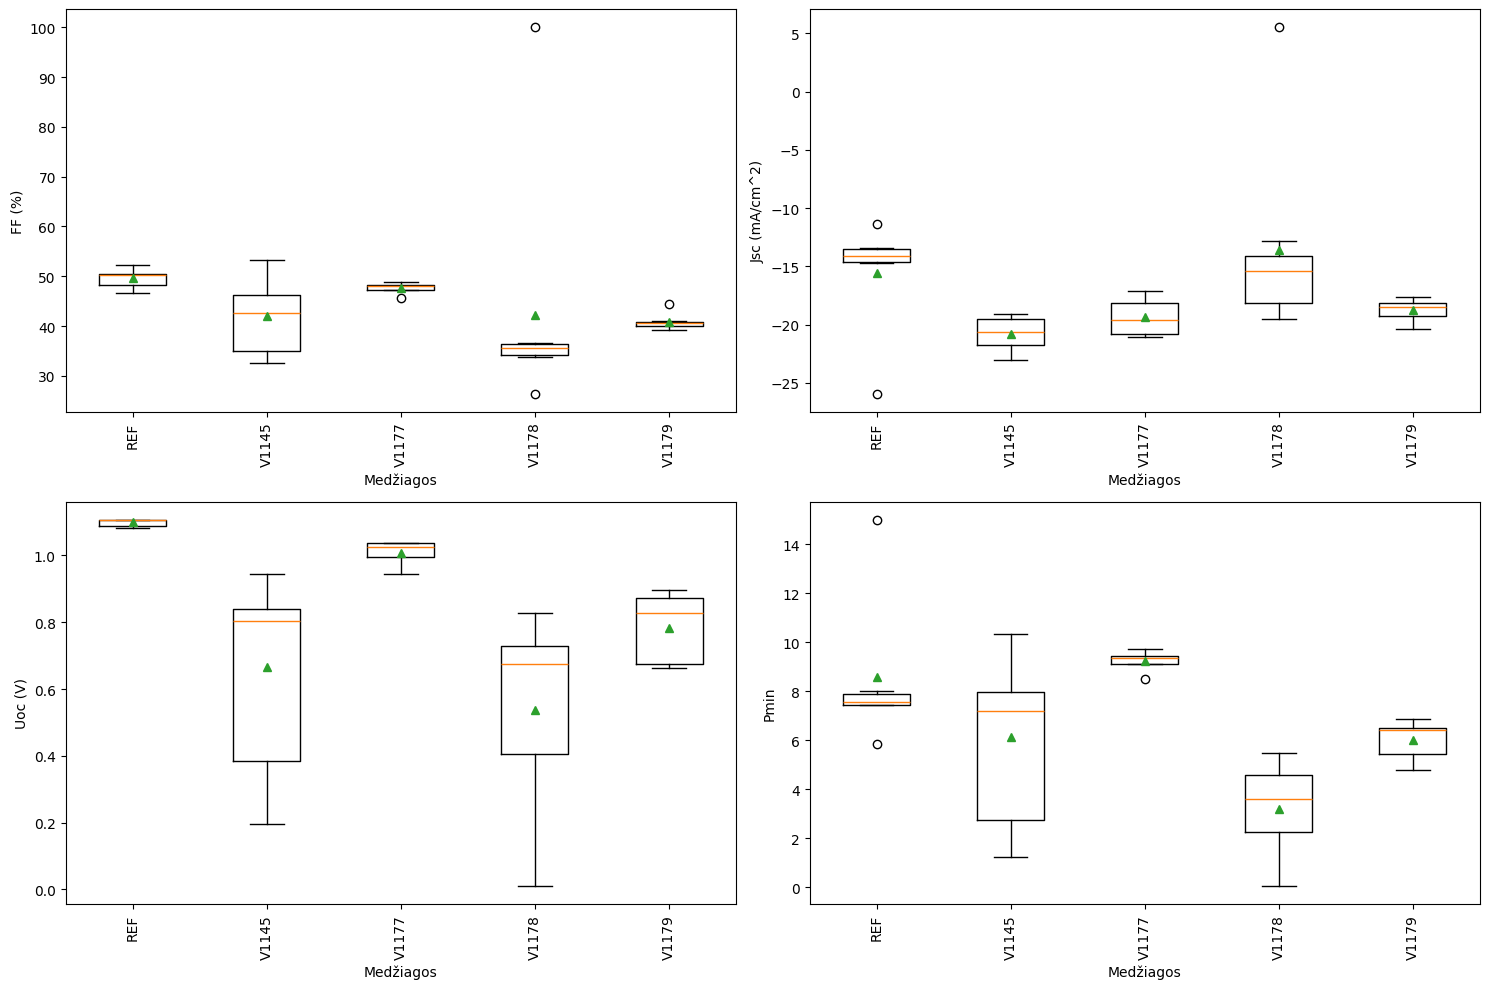

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt

class SolarAnalyzer:
    def __init__(self, filename):
        self.filename = filename
        self.data = pd.read_csv(filename, delimiter=';', header=0)
    
    def process_data(self):
        # Step 1: Padaryti 4-to stulpelio minimalia neigiama verte teigiama
        Pmin = self.data.iloc[:, 3].min()
        if Pmin < 0:
            Pmin = -Pmin  # Konvertuoti Pmin į teigiamą vertę

        # Step 2: Surasti pirmame stulpelyje verte, artima arba lygią 0, ir surasti atitinkamą verte treciame stulpelyje
        closest_to_zero_col1 = self.data.iloc[:, 0].sub(0).abs().idxmin()
        jsc = self.data.iloc[closest_to_zero_col1, 2]

        # Step 3: Surasti treciame stulpelyje verte, artima arba lygią 0, ir surasti atitinkamą verte pirmajame stulpelyje
        closest_to_zero_col3 = self.data.iloc[:, 2].sub(0).abs().idxmin()
        Uoc = self.data.iloc[closest_to_zero_col3, 0]
        
        # Step 4: Apskaičiuoti FF
        FF = (Pmin / (jsc * Uoc)) * 100
        
        # Padaryti FF teigiamą, jei jis yra neigiamas
        if FF < 0:
            FF = -FF
        
        return FF, Pmin, jsc, Uoc

def analyze_directory(directory):
    material_data = {}  # Inicializuojame žodyną

    # Iteruoti per visus .dat failus direktorijoje
    for filename in os.listdir(directory):
        if filename.endswith(".dat"):
            filepath = os.path.join(directory, filename)
            
            # Gauti medžiagos pavadinimą iki pirmo '_'
            material_name = filename.split('_')[0]
            
            # Analizuoti failą
            analyzer = SolarAnalyzer(filepath)
            FF, Pmin, jsc, Uoc = analyzer.process_data()
            
            # Jei medžiaga dar nėra žodyne, sukurkite įrašą
            if material_name not in material_data:
                material_data[material_name] = {
                    'FF': [],
                    'Pmin': [],
                    'jsc': [],
                    'Uoc': []
                }
#kuriamas žodyną material_data, kuriame saugomi duomenys apie skirtingas medžiagas. 
# Kiekvienas medžiagos pavadinimas yra žodyno raktas, o su juo susijusios vertės 
# (FF, Pmin, jsc, Uoc) yra saugomos kaip sąrašai.       
            # Pridėti reikšmes į atitinkamus sąrašus žodyne
            material_data[material_name]['FF'].append(FF)
            material_data[material_name]['Pmin'].append(Pmin)
            material_data[material_name]['jsc'].append(jsc)
            material_data[material_name]['Uoc'].append(Uoc)

    return material_data

# Naudojimas
directory = '../../DATA/OOP_DATA/'
material_data = analyze_directory(directory)

# Ruošiame duomenis boxplot'ams. mat šiuo atveju yra kintamasis, 
# kuris atitinka raktą (key) žodyne material_data
material_names = list(material_data.keys())
FF_values = [material_data[mat]['FF'] for mat in material_names]
Pmin_values = [material_data[mat]['Pmin'] for mat in material_names]
jsc_values = [material_data[mat]['jsc'] for mat in material_names]
Uoc_values = [material_data[mat]['Uoc'] for mat in material_names]

# Boxplot:
fig, axes = plt.subplots(2, 2, figsize=[15, 10])

# FF boxplot
axes[0, 0].boxplot(FF_values, showmeans=True)
axes[0, 0].set_xticks(range(1, len(material_names) + 1))  # Nustato žymes
axes[0, 0].set_xticklabels(material_names, rotation=90)
axes[0, 0].set_xlabel('Medžiagos')
axes[0, 0].set_ylabel('FF (%)')

# jsc boxplot
axes[0, 1].boxplot(jsc_values, showmeans=True)
axes[0, 1].set_xticks(range(1, len(material_names) + 1))  # Nustato žymes
axes[0, 1].set_xticklabels(material_names, rotation=90)
axes[0, 1].set_xlabel('Medžiagos')
axes[0, 1].set_ylabel('Jsc (mA/cm^2)')

# Uoc boxplot
axes[1, 0].boxplot(Uoc_values, showmeans=True)
axes[1, 0].set_xticks(range(1, len(material_names) + 1))  # Nustato žymes
axes[1, 0].set_xticklabels(material_names, rotation=90)
axes[1, 0].set_xlabel('Medžiagos')
axes[1, 0].set_ylabel('Uoc (V)')

# Pmin boxplot
axes[1, 1].boxplot(Pmin_values, showmeans=True)
axes[1, 1].set_xticks(range(1, len(material_names) + 1))  # Nustato žymes
axes[1, 1].set_xticklabels(material_names, rotation=90)
axes[1, 1].set_xlabel('Medžiagos')
axes[1, 1].set_ylabel('Pmin')

plt.tight_layout()
plt.show()


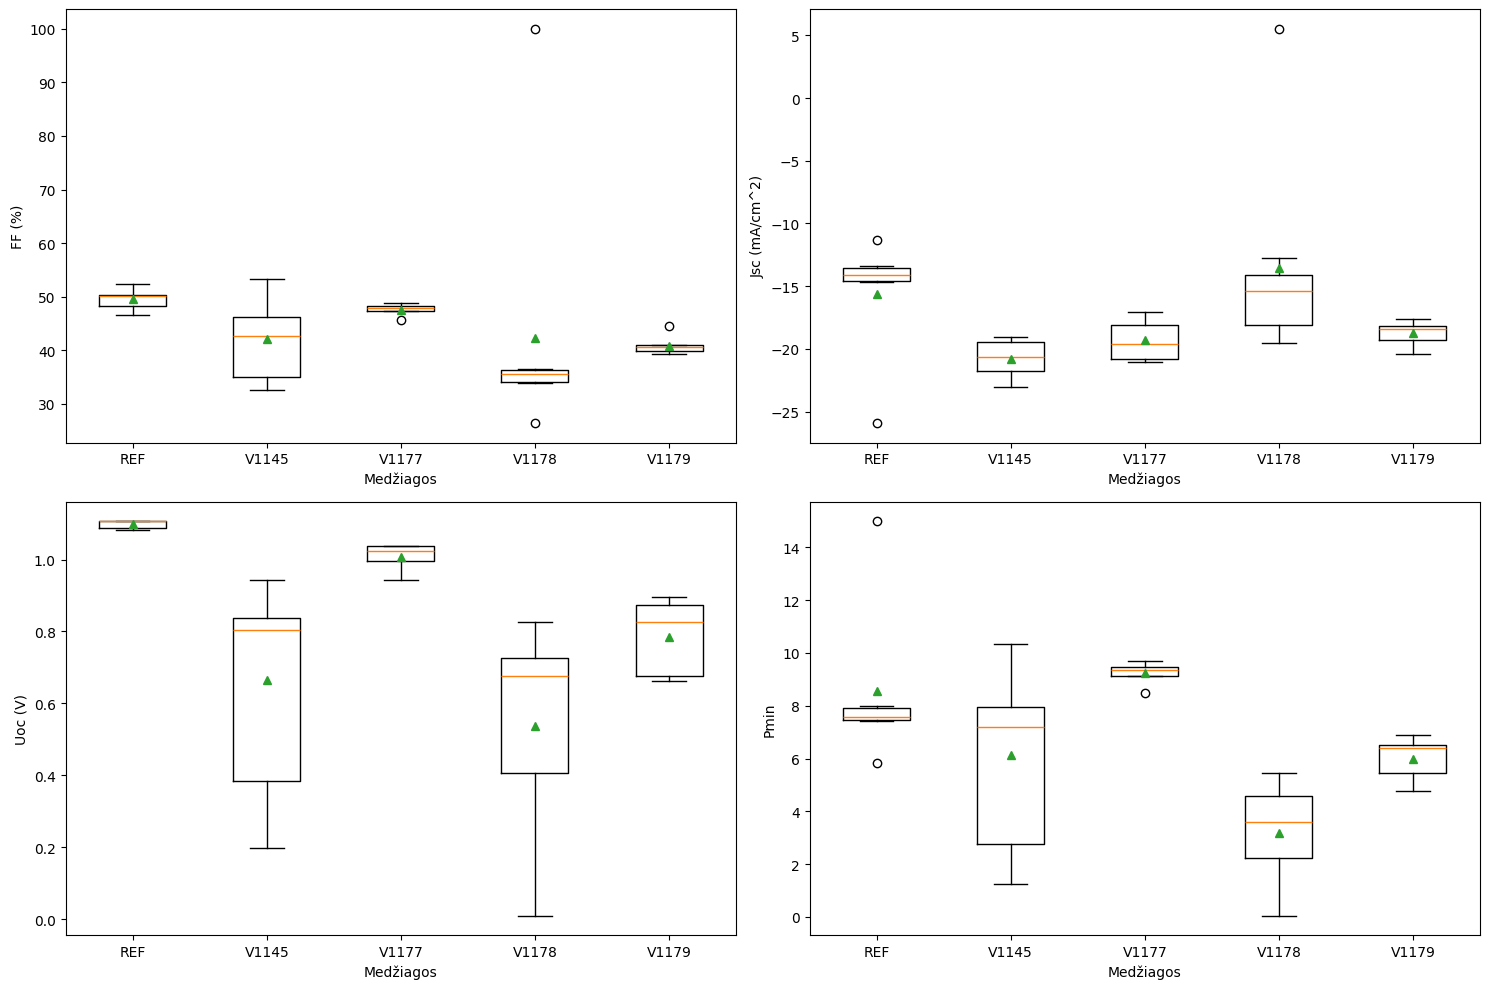

In [30]:
import os
import csv
import glob
import matplotlib.pyplot as plt

class SolarAnalyzer:
    def __init__(self, filename):
        self.filename = filename
        self.data = self.read_data()
    
    def read_data(self):
        with open(self.filename, 'r') as file:
            reader = csv.reader(file, delimiter=';')
            next(reader)
            data = [list(map(float, row)) for row in reader]
        return data

    def process_data(self):
        col4_values = [row[3] for row in self.data]
        Pmin = min(col4_values)
        if Pmin < 0:
            Pmin = -Pmin

        col1_values = [row[0] for row in self.data]
        closest_to_zero_col1_idx = min(range(len(col1_values)), key=lambda i: abs(col1_values[i]))
        jsc = self.data[closest_to_zero_col1_idx][2]

        col3_values = [row[2] for row in self.data]
        closest_to_zero_col3_idx = min(range(len(col3_values)), key=lambda i: abs(col3_values[i]))
        Uoc = self.data[closest_to_zero_col3_idx][0]
        
        FF = (Pmin / (jsc * Uoc)) * 100
        if FF < 0:
            FF = -FF
        
        return FF, Pmin, jsc, Uoc

def analyze_directory(directory):
    material_data = {}

    for filepath in glob.glob(os.path.join(directory, "*.dat")):
        filename = os.path.basename(filepath)
        material_name = filename.split('_')[0]
        
        analyzer = SolarAnalyzer(filepath)
        FF, Pmin, jsc, Uoc = analyzer.process_data()
        
        if material_name not in material_data:
            material_data[material_name] = {
                'FF': [],
                'Pmin': [],
                'jsc': [],
                'Uoc': []
            }
#kuriamas žodyną material_data, kuriame saugomi duomenys apie skirtingas medžiagas. 
# Kiekvienas medžiagos pavadinimas yra žodyno raktas, o su juo susijusios vertės 
# (FF, Pmin, jsc, Uoc) yra saugomos kaip sąrašai. 
        material_data[material_name]['FF'].append(FF)
        material_data[material_name]['Pmin'].append(Pmin)
        material_data[material_name]['jsc'].append(jsc)
        material_data[material_name]['Uoc'].append(Uoc)

    return material_data

# Naudojimas
directory = '../../DATA/OOP_DATA/'
material_data = analyze_directory(directory)

# Ruošiame duomenis boxplot'ams. mat šiuo atveju yra kintamasis, 
# kuris atitinka raktą (key) žodyne material_data
material_names = list(material_data.keys())
FF_values = [material_data[mat]['FF'] for mat in material_names]
Pmin_values = [material_data[mat]['Pmin'] for mat in material_names]
jsc_values = [material_data[mat]['jsc'] for mat in material_names]
Uoc_values = [material_data[mat]['Uoc'] for mat in material_names]

# Boxplot:
fig, axes = plt.subplots(2, 2, figsize=[15, 10])

# FF boxplot
axes[0, 0].boxplot(FF_values, showmeans=True)
axes[0, 0].set_xticks(range(1, len(material_names) + 1))  # Nustato žymes
axes[0, 0].set_xticklabels(material_names, rotation=0)
axes[0, 0].set_xlabel('Medžiagos')
axes[0, 0].set_ylabel('FF (%)')

# jsc boxplot
axes[0, 1].boxplot(jsc_values, showmeans=True)
axes[0, 1].set_xticks(range(1, len(material_names) + 1))  # Nustato žymes
axes[0, 1].set_xticklabels(material_names, rotation=0)
axes[0, 1].set_xlabel('Medžiagos')
axes[0, 1].set_ylabel('Jsc (mA/cm^2)')

# Uoc boxplot
axes[1, 0].boxplot(Uoc_values, showmeans=True)
axes[1, 0].set_xticks(range(1, len(material_names) + 1))  # Nustato žymes
axes[1, 0].set_xticklabels(material_names, rotation=0)
axes[1, 0].set_xlabel('Medžiagos')
axes[1, 0].set_ylabel('Uoc (V)')

# Pmin boxplot
axes[1, 1].boxplot(Pmin_values, showmeans=True)
axes[1, 1].set_xticks(range(1, len(material_names) + 1))  # Nustato žymes
axes[1, 1].set_xticklabels(material_names, rotation=0)
axes[1, 1].set_xlabel('Medžiagos')
axes[1, 1].set_ylabel('Pmin')

plt.tight_layout()
plt.show()

In [17]:
import os
import csv
import glob
import matplotlib.pyplot as plt

class SolarAnalyzer:
    def __init__(self, filename):
        self.filename = filename
        self.data = self.read_data()
    
    def read_data(self):
        with open(self.filename, 'r') as file:
            reader = csv.reader(file, delimiter=';')
            next(reader)
            data = [list(map(float, row)) for row in reader]
        return data

    def process_data(self):
        col4_values = [row[3] for row in self.data]
        Pmin = min(col4_values)
        if Pmin < 0:
            Pmin = -Pmin

        col1_values = [row[0] for row in self.data]
        closest_to_zero_col1_idx = min(range(len(col1_values)), key=lambda i: abs(col1_values[i]))
        jsc = self.data[closest_to_zero_col1_idx][2]

        col3_values = [row[2] for row in self.data]
        closest_to_zero_col3_idx = min(range(len(col3_values)), key=lambda i: abs(col3_values[i]))
        Uoc = self.data[closest_to_zero_col3_idx][0]
        
        FF = (Pmin / (jsc * Uoc)) * 100
        if FF < 0:
            FF = -FF
        
        return FF, Pmin, jsc, Uoc

def analyze_directory(directory):
    material_names = []
    FF_values = []
    Pmin_values = []
    jsc_values = []
    Uoc_values = []

    for filepath in glob.glob(os.path.join(directory, "*.dat")):
        filename = os.path.basename(filepath)
        material_name = filename.split('_')[0]
        
        analyzer = SolarAnalyzer(filepath)
        FF, Pmin, jsc, Uoc = analyzer.process_data()
        
        material_names.append(material_name)
        FF_values.append(FF)
        Pmin_values.append(Pmin)
        jsc_values.append(jsc)
        Uoc_values.append(Uoc)

    return material_names, FF_values, Pmin_values, jsc_values, Uoc_values

# Naudojimas
directory = '../../DATA/OOP_DATA/'
material_names, FF_values, Pmin_values, jsc_values, Uoc_values = analyze_directory(directory)

# Spausdinti rezultatus
print("Medžiaga\tFF\tPmin\tJsc\tUoc")
for i in range(len(material_names)):
    print(f"{material_names[i]}\t{FF_values[i]:.2f}\t{Pmin_values[i]:.2f}\t{jsc_values[i]:.2f}\t{Uoc_values[i]:.2f}")

Medžiaga	FF	Pmin	Jsc	Uoc
REF	52.28	14.99	-25.91	1.11
REF	50.41	7.54	-13.81	1.08
REF	49.99	7.42	-13.42	1.11
REF	50.37	8.01	-14.36	1.11
REF	47.61	5.85	-11.33	1.08
REF	46.65	7.59	-14.70	1.11
V1145	46.55	7.22	-19.30	0.80
V1145	45.77	7.43	-19.64	0.83
V1145	50.73	9.82	-20.52	0.94
V1145	50.70	9.97	-21.37	0.92
V1145	53.26	10.35	-20.60	0.94
V1145	43.61	7.19	-21.14	0.78
V1145	42.71	6.62	-19.28	0.80
V1145	42.61	7.49	-21.89	0.80
V1145	34.65	2.17	-21.64	0.29
V1145	34.05	2.77	-22.63	0.36
V1145	33.15	1.26	-19.25	0.20
V1145	32.61	2.42	-20.61	0.36
V1145	35.31	2.73	-19.04	0.41
V1145	40.27	6.38	-23.06	0.69
V1145	44.33	8.42	-22.35	0.85
V1177	45.58	9.71	-21.02	1.01
V1177	47.87	9.37	-20.75	0.94
V1177	48.75	9.32	-18.43	1.04
V1177	48.01	8.50	-17.08	1.04
V1178	36.23	2.85	-15.74	0.50
V1178	34.27	4.44	-18.27	0.71
V1178	33.83	5.47	-19.55	0.83
V1178	35.17	4.96	-18.09	0.78
V1178	35.82	3.57	-15.03	0.66
V1178	36.59	3.65	-14.53	0.69
V1178	26.44	0.43	-12.78	0.13
V1178	100.00	0.06	5.53	0.01
V1179	44.46	6.09	-19.94	0.69


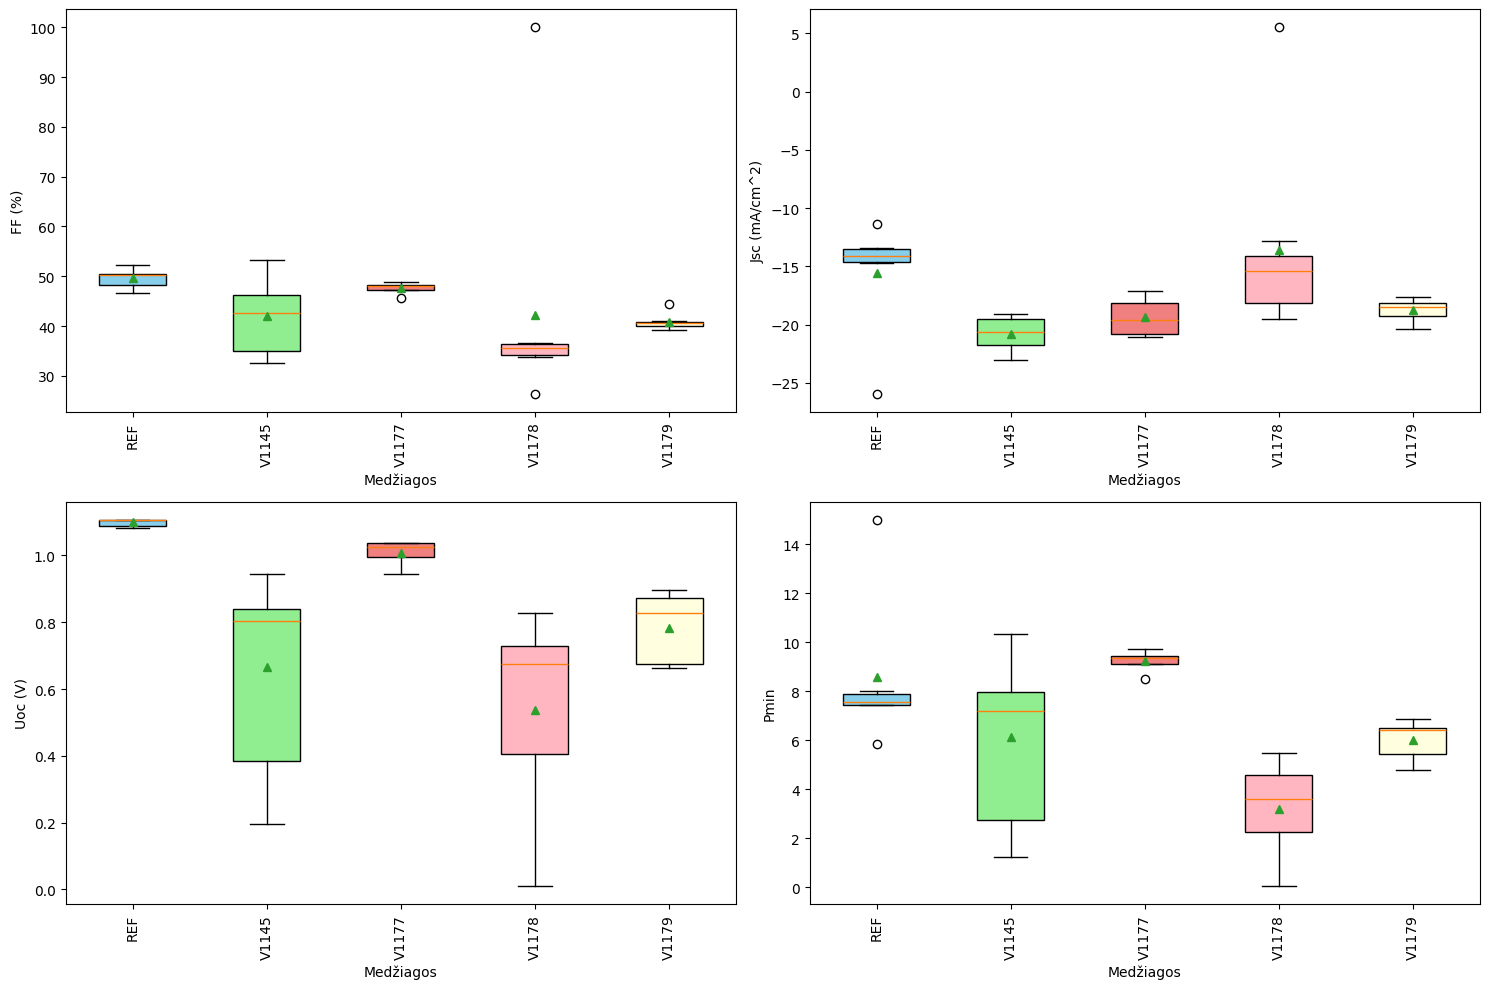

In [29]:
#Nuspalvinau "dezutes"03Paskaita.
import os
import csv
import glob
import matplotlib.pyplot as plt

class SolarAnalyzer:
    def __init__(self, filename):
        self.filename = filename
        self.data = self.read_data()
    
    def read_data(self):
        with open(self.filename, 'r') as file:
            reader = csv.reader(file, delimiter=';')
            next(reader)
            data = [list(map(float, row)) for row in reader]
        return data

    def process_data(self):
        col4_values = [row[3] for row in self.data]
        Pmin = min(col4_values)
        if Pmin < 0:
            Pmin = -Pmin

        col1_values = [row[0] for row in self.data]
        closest_to_zero_col1_idx = min(range(len(col1_values)), key=lambda i: abs(col1_values[i]))
        jsc = self.data[closest_to_zero_col1_idx][2]

        col3_values = [row[2] for row in self.data]
        closest_to_zero_col3_idx = min(range(len(col3_values)), key=lambda i: abs(col3_values[i]))
        Uoc = self.data[closest_to_zero_col3_idx][0]
        
        FF = (Pmin / (jsc * Uoc)) * 100
        if FF < 0:
            FF = -FF
        
        return FF, Pmin, jsc, Uoc

def analyze_directory(directory):
    material_data = {}

    for filepath in glob.glob(os.path.join(directory, "*.dat")):
        filename = os.path.basename(filepath)
        material_name = filename.split('_')[0]
        
        analyzer = SolarAnalyzer(filepath)
        FF, Pmin, jsc, Uoc = analyzer.process_data()
        
        if material_name not in material_data:
            material_data[material_name] = {
                'FF': [],
                'Pmin': [],
                'jsc': [],
                'Uoc': []
            }
#kuriamas žodyną material_data, kuriame saugomi duomenys apie skirtingas medžiagas. 
# Kiekvienas medžiagos pavadinimas yra žodyno raktas, o su juo susijusios vertės 
# (FF, Pmin, jsc, Uoc) yra saugomos kaip sąrašai.
        material_data[material_name]['FF'].append(FF)
        material_data[material_name]['Pmin'].append(Pmin)
        material_data[material_name]['jsc'].append(jsc)
        material_data[material_name]['Uoc'].append(Uoc)

    return material_data

# Naudojimas
directory = '../../DATA/OOP_DATA/'
material_data = analyze_directory(directory)

material_names = list(material_data.keys())
FF_values = [material_data[mat]['FF'] for mat in material_names]
Pmin_values = [material_data[mat]['Pmin'] for mat in material_names]
jsc_values = [material_data[mat]['jsc'] for mat in material_names]
Uoc_values = [material_data[mat]['Uoc'] for mat in material_names]

# Boxplot:
fig, axes = plt.subplots(2, 2, figsize=[15, 10])

# Spalvų sąrašas
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow']

# FF boxplot
box_ff = axes[0, 0].boxplot(FF_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_ff['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 0].set_xticks(range(1, len(material_names) + 1))
axes[0, 0].set_xticklabels(material_names, rotation=90)
axes[0, 0].set_xlabel('Medžiagos')
axes[0, 0].set_ylabel('FF (%)')

# jsc boxplot
box_jsc = axes[0, 1].boxplot(jsc_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_jsc['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 1].set_xticks(range(1, len(material_names) + 1))
axes[0, 1].set_xticklabels(material_names, rotation=90)
axes[0, 1].set_xlabel('Medžiagos')
axes[0, 1].set_ylabel('Jsc (mA/cm^2)')

# Uoc boxplot
box_uoc = axes[1, 0].boxplot(Uoc_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_uoc['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 0].set_xticks(range(1, len(material_names) + 1))
axes[1, 0].set_xticklabels(material_names, rotation=90)
axes[1, 0].set_xlabel('Medžiagos')
axes[1, 0].set_ylabel('Uoc (V)')

# Pmin boxplot
box_pmin = axes[1, 1].boxplot(Pmin_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_pmin['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 1].set_xticks(range(1, len(material_names) + 1))
axes[1, 1].set_xticklabels(material_names, rotation=90)
axes[1, 1].set_xlabel('Medžiagos')
axes[1, 1].set_ylabel('Pmin')

plt.tight_layout()
plt.show()

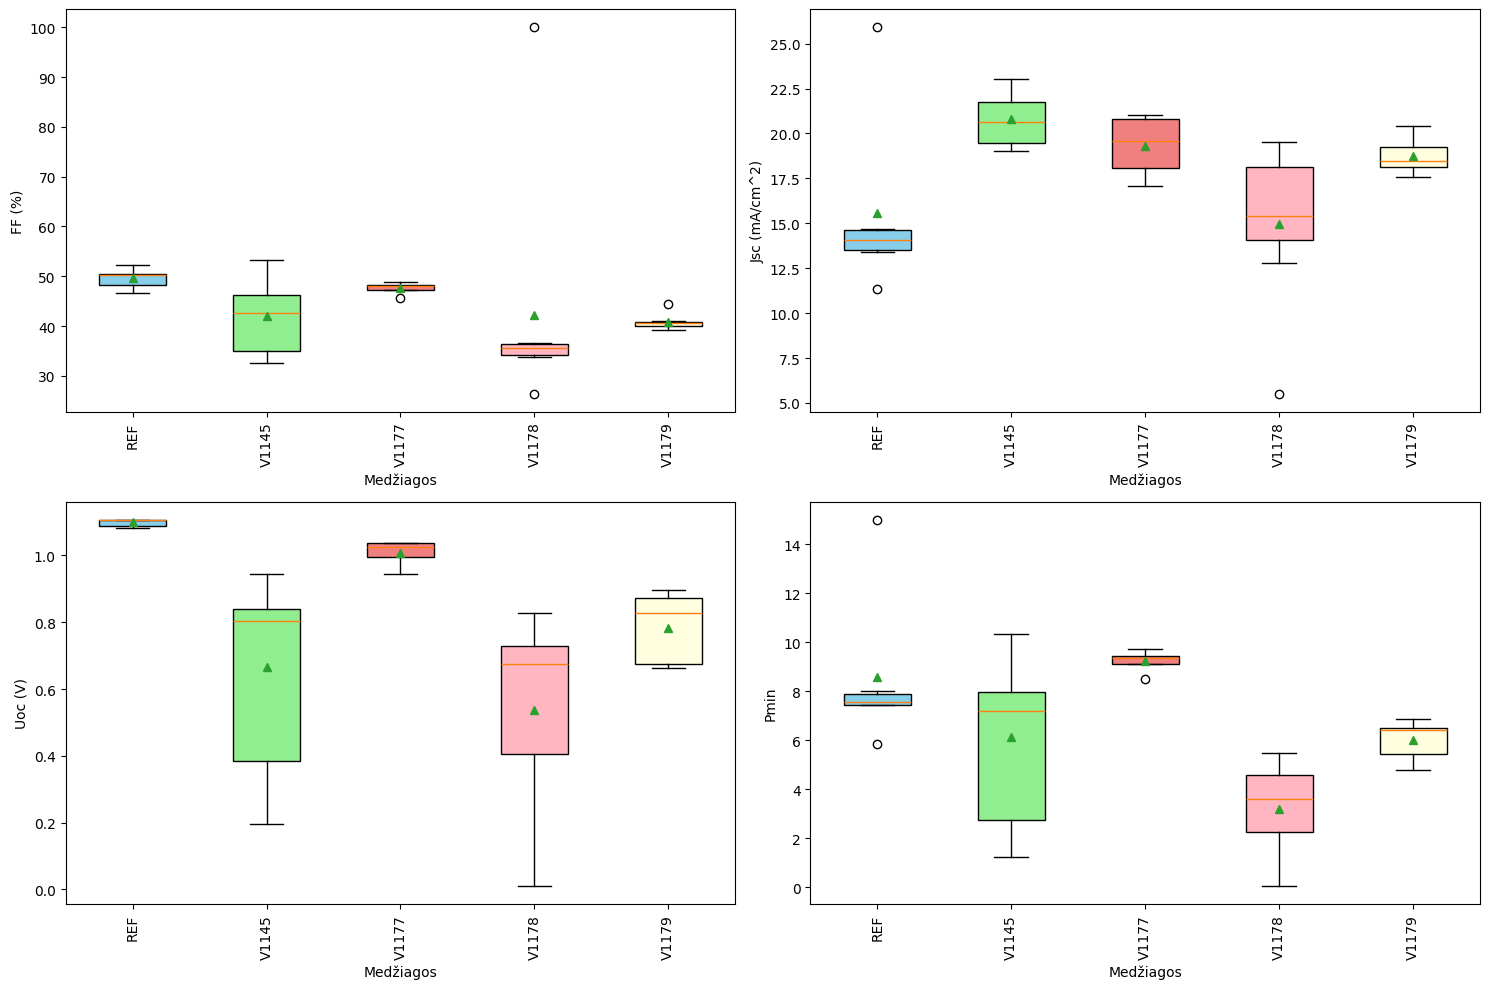

In [1]:
#Nuspalvinau "dezutes". Jcs taip pat teigiamas, kad ats butu kaippas destytoja.
import os
import csv
import glob
import matplotlib.pyplot as plt

class SolarAnalyzer:
    def __init__(self, filename):
        self.filename = filename
        self.data = self.read_data()
    
    def read_data(self):
        with open(self.filename, 'r') as file:
            reader = csv.reader(file, delimiter=';')
            next(reader)
            data = [list(map(float, row)) for row in reader]
        return data

    def process_data(self):
        col4_values = [row[3] for row in self.data]
        Pmin = min(col4_values)
        if Pmin < 0:
            Pmin = -Pmin

        col1_values = [row[0] for row in self.data]
        closest_to_zero_col1_idx = min(range(len(col1_values)), key=lambda i: abs(col1_values[i]))
        jsc = self.data[closest_to_zero_col1_idx][2]
        if jsc<0:
            jsc=-jsc

        col3_values = [row[2] for row in self.data]
        closest_to_zero_col3_idx = min(range(len(col3_values)), key=lambda i: abs(col3_values[i]))
        Uoc = self.data[closest_to_zero_col3_idx][0]
        
        FF = (Pmin / (jsc * Uoc)) * 100
        if FF < 0:
            FF = -FF
        
        return FF, Pmin, jsc, Uoc
# IKI cia kuriau klase.

def analyze_directory(directory):
    material_data = {}
 
    for filepath in glob.glob(os.path.join(directory, "*.dat")):
        filename = os.path.basename(filepath)
        material_name = filename.split('_')[0]
     #Sito budo zodyno kurimui nenaudojau:  
#if material_name not in material_data:
            #material_data[material_name] = None  
            # #  nustatome None, Startas nuo ko pradedame
    
    # Inicializuojame žodyną su tuščiais sąrašais kiekvienai medžiagai
    #material_data = {k: {'FF': [], 'Pmin': [], 'jsc': [], 'Uoc': []} for k in material_data.keys()}
    #Tada dar karta pakartoju pries tai esanti cikla for, kad butu atrinktos medzoiagos 
    # Siuo atveju nereikes if ciklo esancio zemiau.   
        analyzer = SolarAnalyzer(filepath)
        FF, Pmin, jsc, Uoc = analyzer.process_data()
        
        if material_name not in material_data:
            material_data[material_name] = {
                'FF': [],
                'Pmin': [],
                'jsc': [],
                'Uoc': []
            }            
            
#kuriamas žodyną material_data, kuriame saugomi duomenys apie skirtingas medžiagas. 
# Kiekvienas medžiagos pavadinimas yra žodyno raktas, o su juo susijusios vertės 
# (FF, Pmin, jsc, Uoc) yra saugomos kaip sąrašai.
        material_data[material_name]['FF'].append(FF)
        material_data[material_name]['Pmin'].append(Pmin)
        material_data[material_name]['jsc'].append(jsc)
        material_data[material_name]['Uoc'].append(Uoc)

    return material_data

# Naudojimas
directory = '../../DATA/OOP_DATA/'
material_data = analyze_directory(directory)

material_names = list(material_data.keys())
FF_values = [material_data[mat]['FF'] for mat in material_names]
Pmin_values = [material_data[mat]['Pmin'] for mat in material_names]
jsc_values = [material_data[mat]['jsc'] for mat in material_names]
Uoc_values = [material_data[mat]['Uoc'] for mat in material_names]

# Boxplot:
fig, axes = plt.subplots(2, 2, figsize=[15, 10])

# Spalvų sąrašas
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow']

# FF boxplot
box_ff = axes[0, 0].boxplot(FF_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_ff['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 0].set_xticks(range(1, len(material_names) + 1))
axes[0, 0].set_xticklabels(material_names, rotation=90)
axes[0, 0].set_xlabel('Medžiagos')
axes[0, 0].set_ylabel('FF (%)')

# jsc boxplot
box_jsc = axes[0, 1].boxplot(jsc_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_jsc['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 1].set_xticks(range(1, len(material_names) + 1))
axes[0, 1].set_xticklabels(material_names, rotation=90)
axes[0, 1].set_xlabel('Medžiagos')
axes[0, 1].set_ylabel('Jsc (mA/cm^2)')

# Uoc boxplot
box_uoc = axes[1, 0].boxplot(Uoc_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_uoc['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 0].set_xticks(range(1, len(material_names) + 1))
axes[1, 0].set_xticklabels(material_names, rotation=90)
axes[1, 0].set_xlabel('Medžiagos')
axes[1, 0].set_ylabel('Uoc (V)')

# Pmin boxplot
box_pmin = axes[1, 1].boxplot(Pmin_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_pmin['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 1].set_xticks(range(1, len(material_names) + 1))
axes[1, 1].set_xticklabels(material_names, rotation=90)
axes[1, 1].set_xlabel('Medžiagos')
axes[1, 1].set_ylabel('Pmin')

plt.tight_layout()
plt.show()

In [15]:
%reload_ext autoreload
%autoreload 2

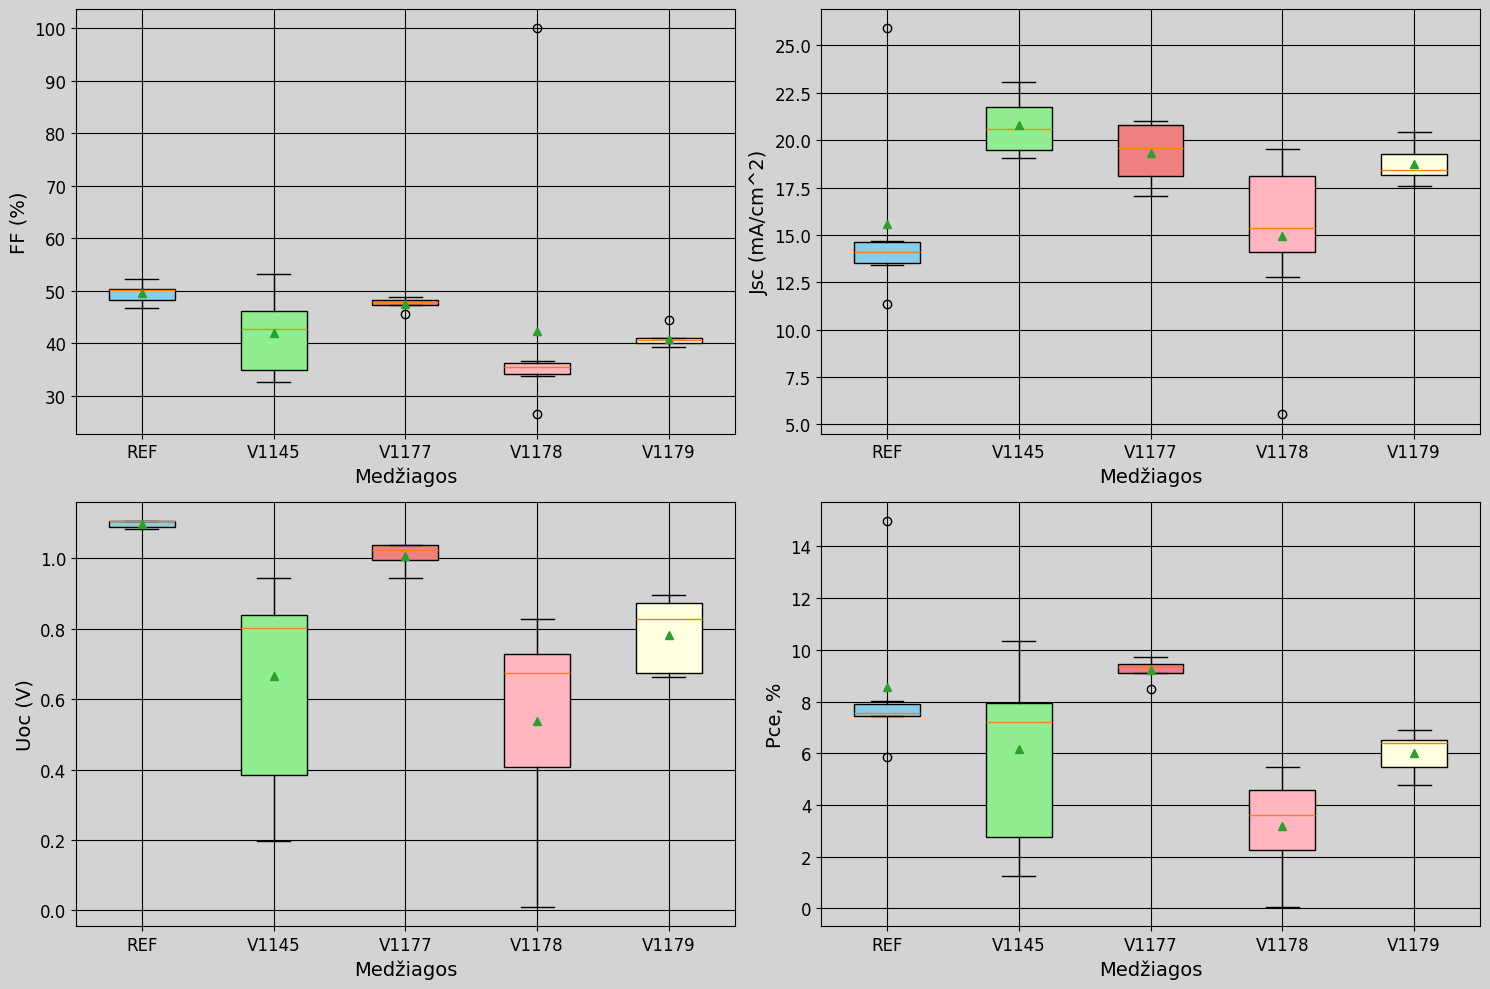

In [8]:
# GALUTINIS VARIANTAS. DARBO PATEIKIMAS KAIP ATASKAITA
# Sutrumpintas kodas. Klase SolarAnalyzer yra irasyta i Mano_Funkcijos. 
# Ji importuojama braizant boxplotus.
import os
import csv 
import glob
import matplotlib.pyplot as plt
from Mano_Funkcijos import SolarAnalyzer

def analyze_directory(directory):
    material_data = {}
# Susirenkame medziagu pavadinimus is direktorijoje esanciu dat failu
    for filepath in glob.glob(os.path.join(directory, "*.dat")):
        filename = os.path.basename(filepath)
        material_name = filename.split('_')[0]
 #  uzkuriama klase, kad butu gauti duomenys    
        analyzer = SolarAnalyzer(filepath)
        FF, Pmin, jsc, Uoc = analyzer.process_data()
 # Ciklas, kurio metu sukuriame keturis sarasus su duomenimis       
        if material_name not in material_data:
            material_data[material_name] = {
                'FF': [],
                'Pmin': [],
                'jsc': [],
                'Uoc': []
            }
        
    # Pridedame duomenis į žodyną material_data
        material_data[material_name]['FF'].append(FF)
        material_data[material_name]['Pmin'].append(Pmin)
        material_data[material_name]['jsc'].append(jsc)
        material_data[material_name]['Uoc'].append(Uoc)

    return material_data

# Naudojimas
directory = '../../DATA/OOP_DATA/'
material_data = analyze_directory(directory)

# Duomenu istraukimas is zodyno braizymui.
material_names = list(material_data.keys())
FF_values = [material_data[mat]['FF'] for mat in material_names]
Pmin_values = [material_data[mat]['Pmin'] for mat in material_names]
jsc_values = [material_data[mat]['jsc'] for mat in material_names]
Uoc_values = [material_data[mat]['Uoc'] for mat in material_names]

# Boxplot:
fig, axes = plt.subplots(2, 2, figsize=[15, 10])

# Spalvų sąrašas
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow']
#Nustatome lapo, ant kurio yra grafikai spalva.
fig.patch.set_facecolor('lightgrey') 
# Nustatome atskirų grafiku fono spalvą
axes[0, 0].set_facecolor('lightgrey')
axes[0, 1].set_facecolor('lightgrey')
axes[1, 0].set_facecolor('lightgrey')
axes[1, 1].set_facecolor('lightgrey')
# FF boxplot
box_ff = axes[0, 0].boxplot(FF_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_ff['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 0].set_xticks(range(1, len(material_names) + 1))
axes[0, 0].set_xticklabels(material_names, rotation=0,fontsize=12)
axes[0, 0].set_xlabel('Medžiagos',fontsize=14)
axes[0, 0].set_ylabel('FF (%)',fontsize=14)
axes[0, 0].tick_params(axis='y', labelsize=12)
axes[0, 0].grid(True, color='black')
# jsc boxplot
box_jsc = axes[0, 1].boxplot(jsc_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_jsc['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 1].set_xticks(range(1, len(material_names) + 1))
axes[0, 1].set_xticklabels(material_names, rotation=0, fontsize=12)
axes[0, 1].set_xlabel('Medžiagos',fontsize=14)
axes[0, 1].set_ylabel('Jsc (mA/cm^2)',fontsize=14)
axes[0, 1].tick_params(axis='y', labelsize=12)
axes[0, 1].grid(True, color='black')
# Uoc boxplot
box_uoc = axes[1, 0].boxplot(Uoc_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_uoc['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 0].set_xticks(range(1, len(material_names) + 1))
axes[1, 0].set_xticklabels(material_names, rotation=0, fontsize=12)
axes[1, 0].set_xlabel('Medžiagos',fontsize=14)
axes[1, 0].set_ylabel('Uoc (V)',fontsize=14)
axes[1, 0].tick_params(axis='y', labelsize=12)
axes[1, 0].grid(True, color='black')
# Pmin boxplot
box_pmin = axes[1, 1].boxplot(Pmin_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_pmin['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 1].set_xticks(range(1, len(material_names) + 1))
axes[1, 1].set_xticklabels(material_names, rotation=0, fontsize=12)
axes[1, 1].set_xlabel('Medžiagos',fontsize=14)
axes[1, 1].set_ylabel('Pce, %',fontsize=14)
axes[1, 1].tick_params(axis='y', labelsize=12)
axes[1, 1].grid(True, color='black')
 
 #Komanda braizymui
plt.tight_layout()
plt.show()

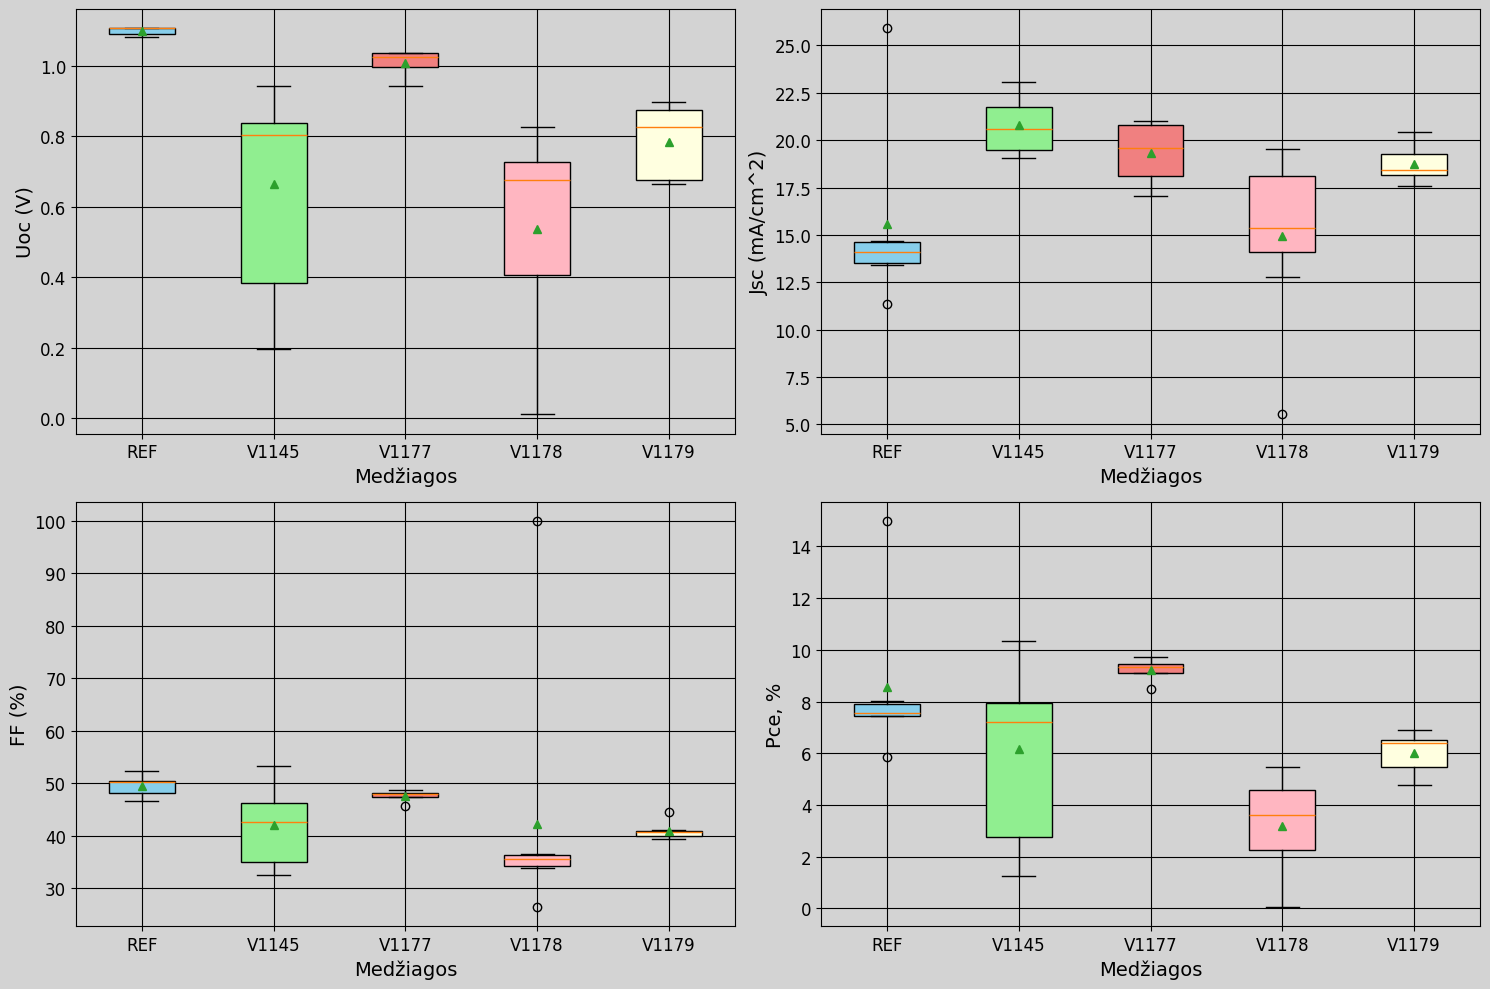

In [12]:
# GALUTINIS VARIANTAS. DARBO PATEIKI-.MAS KAIP ATASKAITA
# Sutrumpintas kodas. Klase SolarAnalyzer yra irasyta i Mano_Funkcijos. 
# Ji importuojama braizant boxplotus.
import os
import csv 
import glob
import matplotlib.pyplot as plt
from Mano_Funkcijos import SolarAnalyzer

def analyze_directory(directory):
    material_data = {}

    for filepath in glob.glob(os.path.join(directory, "*.dat")):
        filename = os.path.basename(filepath)
        material_name = filename.split('_')[0]
        
        analyzer = SolarAnalyzer(filepath)
        FF, Pmin, jsc, Uoc = analyzer.process_data()
        
        if material_name not in material_data:
            material_data[material_name] = {
                'FF': [],
                'Pmin': [],
                'jsc': [],
                'Uoc': []
            }
        
        # Pridedame duomenis į žodyną material_data
        material_data[material_name]['FF'].append(FF)
        material_data[material_name]['Pmin'].append(Pmin)
        material_data[material_name]['jsc'].append(jsc)
        material_data[material_name]['Uoc'].append(Uoc)

    return material_data

# Naudojimas
directory = '../../DATA/OOP_DATA/'
material_data = analyze_directory(directory)

material_names = list(material_data.keys())
FF_values = [material_data[mat]['FF'] for mat in material_names]
Pmin_values = [material_data[mat]['Pmin'] for mat in material_names]
jsc_values = [material_data[mat]['jsc'] for mat in material_names]
Uoc_values = [material_data[mat]['Uoc'] for mat in material_names]

# Boxplot:
fig, axes = plt.subplots(2, 2, figsize=[15, 10])

# Spalvų sąrašas
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow']
#Nustatome lapo, ant kurio yra grafikai spalva.
fig.patch.set_facecolor('lightgrey') 
# Nustatome atskirų grafiku fono spalvą
axes[0, 0].set_facecolor('lightgrey')
axes[0, 1].set_facecolor('lightgrey')
axes[1, 0].set_facecolor('lightgrey')
axes[1, 1].set_facecolor('lightgrey')
# FF boxplot
box_ff = axes[1, 0].boxplot(FF_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_ff['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 0].set_xticks(range(1, len(material_names) + 1))
axes[1, 0].set_xticklabels(material_names, rotation=0,fontsize=12)
axes[1, 0].set_xlabel('Medžiagos',fontsize=14)
axes[1, 0].set_ylabel('FF (%)',fontsize=14)
axes[1, 0].tick_params(axis='y', labelsize=12)
axes[1, 0].grid(True, color='black')
# jsc boxplot
box_jsc = axes[0, 1].boxplot(jsc_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_jsc['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 1].set_xticks(range(1, len(material_names) + 1))
axes[0, 1].set_xticklabels(material_names, rotation=0, fontsize=12)
axes[0, 1].set_xlabel('Medžiagos',fontsize=14)
axes[0, 1].set_ylabel('Jsc (mA/cm^2)',fontsize=14)
axes[0, 1].tick_params(axis='y', labelsize=12)
axes[0, 1].grid(True, color='black')
# Uoc boxplot
box_uoc = axes[0, 0].boxplot(Uoc_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_uoc['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 0].set_xticks(range(1, len(material_names) + 1))
axes[0, 0].set_xticklabels(material_names, rotation=0, fontsize=12)
axes[0, 0].set_xlabel('Medžiagos',fontsize=14)
axes[0, 0].set_ylabel('Uoc (V)',fontsize=14)
axes[0, 0].tick_params(axis='y', labelsize=12)
axes[0, 0].grid(True, color='black')
# Pmin boxplot
box_pmin = axes[1, 1].boxplot(Pmin_values, patch_artist=True, showmeans=True)
for patch, color in zip(box_pmin['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 1].set_xticks(range(1, len(material_names) + 1))
axes[1, 1].set_xticklabels(material_names, rotation=0, fontsize=12)
axes[1, 1].set_xlabel('Medžiagos',fontsize=14)
axes[1, 1].set_ylabel('Pce, %',fontsize=14)
axes[1, 1].tick_params(axis='y', labelsize=12)
axes[1, 1].grid(True, color='black')
 
 #Komanda braizymui
plt.tight_layout()
plt.show()